In [1]:
from scipy import sparse
import csv
import sys
import os
import pandas
import numpy as np
import multiprocessing
import random
from sklearn.externals import joblib

In [2]:
X = []
Y = []
f1=open(unicode('./datasetPersonTab'))
f2=open(unicode('./datasetNNPTab'))
for i, line in enumerate(f1):
    if (i == 0):
        continue
    X.append(line.strip().split('\t')[4:])
    Y.append('Person')
size = len(X)
for i, line in enumerate(f2):
    if (i == 0):
        continue
    X.append(line.strip().split('\t')[4:])
    Y.append('No')

In [3]:
X_test = []
Y_test = []
f1=open(unicode('./datasetPersonTabLastTest'))
f2=open(unicode('./datasetNNPTabLastTest'))
for i, line in enumerate(f1):
    if (i == 0):
        continue
    X_test.append(line.strip().split('\t')[4:])
    Y_test.append('Person')
for i, line in enumerate(f2):
    if (i == 0):
        continue
    X_test.append(line.strip().split('\t')[4:])
    Y_test.append('No')

In [4]:
X_ = []
Y_ = []
f1=open(unicode('./datasetPersonTabTest'))
f2=open(unicode('./datasetNNPTabTest'))
for i, line in enumerate(f1):
    if (i == 0):
        continue
    X_.append(line.strip().split('\t')[4:])
    Y_.append('Person')
for i, line in enumerate(f2):
    if (i == 0):
        continue
    X_.append(line.strip().split('\t')[4:])
    Y_.append('No')

In [27]:
set_futures =[]
for i in range(27):
    set_futures.append(set())
for x in X+X_test+X_:
    for i, x_i in enumerate(x):
        set_futures[i].add(x_i)

In [28]:
feature_dict = []
for i in range(27):
    feature_dict.append(dict())
    
for i in range(27):
    count = 0
    for x in set_futures[i]:
        feature_dict[i][x] = count
        count+=1

In [29]:
filename = './DiplomaDataPerson_feature_dict.joblib.pkl'
joblib.dump(feature_dict, filename, compress=3)

['./DiplomaDataPerson_feature_dict.joblib.pkl']

In [30]:
filename = './DiplomaDataPerson_set_futures.joblib.pkl'
joblib.dump(set_futures, filename, compress=3)

['./DiplomaDataPerson_set_futures.joblib.pkl']

In [31]:
X_int=[]
for x in X:
    X_int.append([0]*len(x)) 
for i, x in enumerate(X):
    for j, x_j in enumerate(x):
        X_int[i][j]=feature_dict[j][x_j]

In [32]:
filename = './DiplomaDataPerson_X_int.joblib.pkl'
joblib.dump(X_int, filename, compress=3)

['./DiplomaDataPerson_X_int.joblib.pkl']

In [33]:
X__int=[]
for x in X_:
    X__int.append([0]*len(x)) 
for i, x in enumerate(X_):
    for j, x_j in enumerate(x):
        X__int[i][j]=feature_dict[j][x_j]

In [34]:
filename = './DiplomaDataPerson_X_int_test.joblib.pkl'
joblib.dump(X__int, filename, compress=3)

['./DiplomaDataPerson_X_int_test.joblib.pkl']

In [35]:
X_int_test=[]
for x in X_test:
    X_int_test.append([0]*len(x)) 
for i, x in enumerate(X_test):
    for j, x_j in enumerate(x):
        X_int_test[i][j]=feature_dict[j][x_j]

In [36]:
filename = './DiplomaDataPerson_X_int_test_last.joblib.pkl'
joblib.dump(X_int_test, filename, compress=3)

['./DiplomaDataPerson_X_int_test_last.joblib.pkl']

In [37]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


In [38]:
X_gl = X_int+X_int_test+X__int

In [39]:
for i in range(len(X_int_test)):
    if len(X_int_test[i]) != 27:
        print i, len(X_int_test[i])

In [40]:
enc.fit_transform(X_int+X_int_test+X__int)
filename = './DiplomaDataPerson_enc.joblib.pkl'
joblib.dump(enc, filename, compress=3)

['./DiplomaDataPerson_enc.joblib.pkl']

In [5]:
X_int = joblib.load('./DiplomaDataPerson_X_int.joblib.pkl')
X__int = joblib.load('./DiplomaDataPerson_X_int_test.joblib.pkl')
X_test_int = joblib.load('./DiplomaDataPerson_X_int_test_last.joblib.pkl')
enc = joblib.load('./DiplomaDataPerson_enc.joblib.pkl')
X__int = joblib.load('./DiplomaDataPerson_X_int_test.joblib.pkl')

In [216]:
random.shuffle(X_int[size:])
X_sparse_matrix = enc.transform(X_int)

In [218]:
import sklearn.ensemble  
RFs = []
i = 100000
while (i < len(X_int)): 
    RF = sklearn.ensemble.RandomForestClassifier(n_estimators=200, max_depth=30, n_jobs=-1)
    X_new = RF.fit_transform(X_sparse_matrix[:i], Y[:i])
    RFs.append(RF)
    i+=20000

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transfor

In [68]:
import sklearn.ensemble  
RF = sklearn.ensemble.RandomForestClassifier(n_estimators=400, max_depth=100, n_jobs=-1)

In [69]:
RF.fit_transform(enc.transform(X_int[:200000]), Y[:200000])

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


<200000x13396 sparse matrix of type '<type 'numpy.float64'>'
	with 4983979 stored elements in Compressed Sparse Column format>

In [70]:
filename = './DiplomaDataPerson_RF400_100.joblib.pkl'
joblib.dump(RF, filename, compress=3)

['./DiplomaDataPerson_RF400_100.joblib.pkl']

In [6]:
filename = './DiplomaDataPerson_RFs100_30.joblib.pkl'
RFs = joblib.load(filename)

In [61]:
random.shuffle(X__int[46849:])
for i, rf in enumerate(RFs):
    if (i > 13):
        break
    print 100000 + i*20000
    Y_test_results = rf.predict_proba(enc.transform(X__int[:160000]))
    metrics(Y_test_results, 100000 + i*20000)

100000
0.999999997866
0.292812499817
0.452985219539
113150 0 46850 0
120000
0.999999997866
0.293248707269
0.453507021199
112912 0 46850 238
140000
0.999487724654
0.298023191979
0.459141414951
110296 24 46826 2854
160000
0.996584843124
0.320939791777
0.485522166784
98789 160 46690 14361
180000
0.965955174032
0.395862490906
0.561580897446
69065 1595 45255 44085
200000
0.65024546286
0.627735420095
0.638792148299
18066 16386 30464 95084
220000
0.256328708097
0.727201158246
0.379048000161
4505 34841 12009 108645
240000
0.149946637887
0.836807613618
0.254321631374
1370 39825 7025 111780
260000
0.0261259337756
0.838356106962
0.050672732492
236 45626 1224 112914
280000
0.0108858057398
0.868824383505
0.0215022003869
77 46340 510 113073
300000
0.0086659551576
0.837113229461
0.0171543234512
79 46444 406 113071
320000
0.000875133402614
0.931816064054
0.00174862436257
3 46809 41 113147
340000
0.0
0.0
0.0
0 46850 0 113150
360000
2.13447171369e-05
0.999900009999
4.26885187391e-05
0 46849 1 113150


In [ ]:
filename = './DiplomaDataPerson_RF100_200000_30.joblib.pkl'
joblib.dump(RF, filename, compress=3)

In [67]:
Y_test_results = RF.predict_proba(enc.transform(X__int[:100000]))
metrics(Y_test_results, 200000)

0.843970115595
0.774019260876
0.80748253876
11544 7310 39540 41606


In [211]:
print Y_test_result[10:20]
print X_test[18][1]

[[ 0.51005765  0.48994235]
 [ 0.4980023   0.5019977 ]
 [ 0.51005765  0.48994235]
 [ 0.50786131  0.49213869]
 [ 0.50295742  0.49704258]
 [ 0.51005765  0.48994235]
 [ 0.51005765  0.48994235]
 [ 0.49935177  0.50064823]
 [ 0.51005765  0.48994235]
 [ 0.51005765  0.48994235]]
Branislav


In [63]:
metrics(Y_test_result)

NameError: name 'Y_test_result' is not defined

In [39]:
recall_set = dict()
presision_set = dict()
F_measure_set = dict()

In [43]:
def metrics(Y_test_result, length):
    f_n = 0
    f_p = 0
    t_n=0
    t_p=0
    for i, y in enumerate(Y_test_result):
        y_str = 'No'
        if y[1]>0.5:
            y_str = 'Person'
        if y_str != Y_[i]:
            if y_str=='No':
                f_n+=1
                #if random.uniform(0, 1)>0.75:
                   # print X_test[i][1]
                #print X[10000+i]
            else:
                f_p+=1 
                #if random.uniform(0, 1)>0.75:
                    #print X_[i][1]
                #print X_[10000+i]
        elif y_str =='No':
            t_n+=1
        else:
            t_p+=1
            #print X_test[i][1]
    recall = t_p*1./(t_p+f_n+0.0001)
    presision = t_p*1./(t_p+f_p+0.0001)
    print recall
    print presision
    F_measure = 2*presision*recall/(presision+recall+0.0000001)
    print F_measure 
    print f_p, f_n, t_p, t_n  
    recall_set[length] = recall
    presision_set[length] = presision
    F_measure_set[length] = F_measure

In [17]:
from matplotlib import rc
 
font = {'family': 'Droid Sans',
        'weight': 'normal'}
rc('font', **font)

100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000


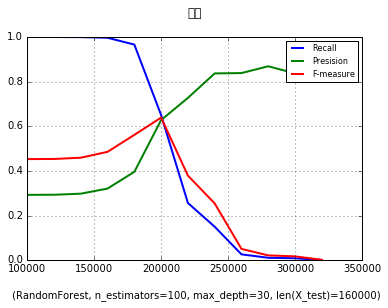

In [62]:
# -*- coding: utf-8 -*-
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt

def save(name=''):
    plt.savefig('./pictures/'+ name, fmt='png')
    #plt.close()

import numpy as np
l=['Recall' , 'Presision' , 'F-measure']

# Пример функции с объединением в кортеж *args
def f_sums(*args):

    list1 = []
    for arg in args:
        a = 0
        for i in arg:
            a += i
        list1.append(a)

    return list1


# Пример функции с объединением и в кортеж args и в словарь **kwargs
def f_plot(*args, **kwargs):

    xlist = []
    ylist = []
    for i, arg in enumerate(args):
        if(i % 2 == 0):
            xlist.append(arg)
        else:
            ylist.append(arg) 
    
    colors = kwargs.pop('colors', 'k')
    linewidth = kwargs.pop('linewidth', 1.)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    i = 0
    for x, y, color in zip(xlist, ylist, colors):
        i += 1
        ax.plot(x, y, color=color, linewidth=linewidth, label=l[i-1])
    
    ax.grid(True)
    #ax.legend()
    plt.legend(loc=1,prop={'size':8})
    #plt.title(u'Зависимость метрик качества\n от доли negative-примеров в обучающей выборке\n')
    plt.title(u'За\n')
    plt.xlabel(u'\n (RandomForest, n_estimators=100, max_depth=30, len(X_test)=160000)')
    #save(u'1')
    

x = []
y1 =[]
y2 =[]
y3 =[]

keys = F_measure_set.keys()
keys.sort()
for x_ in keys[:12]:
    print x_
    x.append(x_)
    y1.append(recall_set[x_])
    y2.append(presision_set[x_])
    y3.append(F_measure_set[x_])
filename = './DiplomaDataPerson_GrX10T.pkl'
joblib.dump(x, filename,compress=3)
filename = './DiplomaDataPerson_GrRec10T.pkl'
joblib.dump(y1, filename,compress=3)
filename = './DiplomaDataPerson_GrPre10T.pkl'
joblib.dump(y2, filename,compress=3)
filename = './DiplomaDataPerson_GrF10T.pkl'
joblib.dump(y3, filename,compress=3)
    
f_plot(x , y1, x, y2, x , y3, colors=['blue', 'green', 'red'], linewidth=2.)